# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from  sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [82]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

ValueError: Value must have type '<class 'int'>'

In [83]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [84]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [85]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португал..."
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho..."
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R'..."
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' -..."
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' -..."
8,Medu,"Образование матери: 0 - без образования, 1 - н..."
9,Fedu,"Образование отца: 0 - без образования, 1 - нач..."


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [86]:
data[(data['Pstatus']!='A')&(data['Pstatus']!='T')].Pstatus
data = data.replace({'Pstatus':'t'}, 'T')
data[(data['Pstatus']!='A')&(data['Pstatus']!='T')].Pstatus

Series([], Name: Pstatus, dtype: object)

In [87]:
data[(data['sex']!='F')&(data['sex']!='M')].sex
data = data.replace({'sex':'m'}, 'M')
data[(data['sex']!='F')&(data['sex']!='M')].sex

Series([], Name: sex, dtype: object)

In [88]:
data[(data['Medu']!='0')&(data['Medu']!='1')&(data['Medu']!='2')&(data['Medu']!='3')&(data['Medu']!='4')].Medu
data = data.replace({'Medu':'o'}, '0')
data[(data['Medu']!='0')&(data['Medu']!='1')&(data['Medu']!='2')&(data['Medu']!='3')&(data['Medu']!='4')].Medu

Series([], Name: Medu, dtype: object)

In [89]:
data[(data['Fedu']!='0')&(data['Fedu']!='1')&(data['Fedu']!='2')&(data['Fedu']!='3')&(data['Fedu']!='4')].Fedu
data = data.replace({'Fedu':'o'}, '0')
data[(data['Fedu']!='0')&(data['Fedu']!='1')&(data['Fedu']!='2')&(data['Fedu']!='3')&(data['Fedu']!='4')].Fedu

Series([], Name: Fedu, dtype: object)

In [90]:
data[(data['Mjob']!='teacher')&(data['Mjob']!='health')&(data['Mjob']!='services')&(data['Mjob']!='at_home')&(data['Mjob']!='other')].Mjob
data = data.replace({'Mjob':'at-home'}, 'at_home')
data[(data['Mjob']!='teacher')&(data['Mjob']!='health')&(data['Mjob']!='services')&(data['Mjob']!='at_home')&(data['Mjob']!='other')].Mjob

Series([], Name: Mjob, dtype: object)

In [91]:
data[(data['Fjob']!='teacher')&(data['Fjob']!='health')&(data['Fjob']!='services')&(data['Fjob']!='at_home')&(data['Fjob']!='other')].Fjob
data = data.replace({'Fjob':'at-home'}, 'at_home')
data[(data['Fjob']!='teacher')&(data['Fjob']!='health')&(data['Fjob']!='services')&(data['Fjob']!='at_home')&(data['Fjob']!='other')].Fjob

Series([], Name: Fjob, dtype: object)

In [92]:
data[(data['guardian']!='mother')&(data['guardian']!='father')&(data['guardian']!='other')].guardian
data = data.replace({'guardian':'futher'}, 'father')
data[(data['guardian']!='mother')&(data['guardian']!='father')&(data['guardian']!='other')].guardian

Series([], Name: guardian, dtype: object)

In [93]:
data.isnull().sum()

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64

In [94]:
data[['famrel', 'Dalc', 'Walc']] = data[['famrel', 'Dalc', 'Walc']].fillna(2.5)
data = data.drop(['cheating'], axis=1)
data['romantic'] = data['romantic'].fillna('no')
data.isnull().sum()

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [95]:
data['schoolsup'].replace(['yes', 'no'],[1, 0], inplace = True)
data['famsup'].replace(['yes', 'no'],[1, 0], inplace = True)
data['paid'].replace(['yes', 'no'],[1, 0], inplace = True)
data['activities'].replace(['yes', 'no'],[1, 0], inplace = True)
data['nursery'].replace(['yes', 'no'],[1, 0], inplace = True)
data['higher'].replace(['yes', 'no'],[1, 0], inplace = True)
data['internet'].replace(['yes', 'no'],[1, 0], inplace = True)
data['romantic'].replace(['yes', 'no'],[1, 0], inplace = True)

In [96]:
label_encoder = LabelEncoder()

for column in data.columns:
    if (data[column].dtype.name == "object"):
        data[column] = label_encoder.fit_transform(data[column])
        
data.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,1,0,0,16,1,0,0,3,4,3,2,0,0,1,1,0,0,0,0,0,1,1,1,0,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,1,0,0,17,1,0,1,3,2,2,2,0,1,1,2,0,0,0,0,1,0,1,1,0,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,1,0,1,16,1,1,1,1,2,1,3,0,1,2,1,2,0,0,0,0,0,1,1,0,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,1,1,1,17,1,0,1,2,3,2,3,1,0,2,2,0,0,0,0,1,1,1,1,0,4.0,4,3,1.0,1.0,3,4,14,15,16
4,103131,1,0,0,16,1,0,1,1,1,0,2,1,1,2,1,0,0,1,0,0,1,1,0,0,4.0,3,2,1.0,4.0,5,2,12,13,13


In [97]:
data.corr()['G3']

ID            0.015469
Subject       0.187166
school       -0.127114
sex          -0.031472
age          -0.125282
address       0.117696
famsize       0.061209
Pstatus      -0.030693
Medu          0.201472
Fedu          0.159796
Mjob          0.105640
Fjob          0.040541
reason        0.108671
guardian     -0.077320
traveltime   -0.102627
studytime     0.161629
failures     -0.383145
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
nursery       0.039950
higher        0.236578
internet      0.107064
romantic     -0.100837
famrel        0.051686
freetime     -0.064890
goout        -0.097877
Dalc         -0.120266
Walc         -0.113339
health       -0.080079
absences     -0.045671
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64

Остаются признаки: Subject, school, age, address, Medu, Fedu, Mjob, reason, traveltime, studytime, failures, higher, internet, Dalc, Walc, G1 и G2.

In [98]:
data.drop(['ID', 'sex', 'famsize', 'Pstatus', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 
           'activities', 'nursery', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'],
          axis = 1, inplace = True)

In [99]:
data['Alc'] = round((data['Dalc']+data['Walc'])/2).astype('int64')
data.drop(['Dalc', 'Walc'], axis = 1, inplace = True)
data.head()

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc
0,1,0,16,1,3,4,3,0,1,1,0,1,1,15,13,14,2
1,1,0,17,1,3,2,2,0,1,2,0,1,1,17,18,17,2
2,1,0,16,1,1,2,1,0,2,1,2,1,1,9,8,10,4
3,1,1,17,1,2,3,2,1,2,2,0,1,1,14,15,16,1
4,1,0,16,1,1,1,0,1,2,1,0,1,0,12,13,13,2


## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

### C G1

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G3', 'G2'], axis=1), data['G3'])

In [104]:
X_train.shape

(783, 15)

In [105]:
X_test.shape

(261, 15)

In [106]:
y_train.shape

(783,)

In [107]:
y_test.shape

(261,)

#### Линейная регрессия

In [108]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
y_pred = linear.predict(X_test)
y_pred

array([11.89768734, 14.60135894,  9.23556096, 13.43295097,  7.6104634 ,
       15.51379296,  6.75539631, 10.5657376 , 16.58020606, 14.69795967,
       15.00336991,  8.94178461, 12.62117628, 14.63687207,  6.96242016,
        5.3476947 , 14.54580197,  9.8623171 , 11.52954645, 11.63905861,
       11.82315881,  5.07857976, 13.56158034,  8.68351157, 15.5170911 ,
        9.86589959, 15.74287235,  9.02656031, 10.64443403, 10.84919979,
        7.59746048, 14.07753182, 12.63748712,  8.11471601,  9.01692124,
       18.93637268, 11.18557918,  7.19105807, 12.99003425,  8.1452036 ,
       14.77945385, 12.7441494 ,  7.08350169, 10.38034141, 10.36715275,
       17.79847192, 10.84495797, 12.72794753, 11.82587734,  9.206802  ,
        8.09718867,  8.38689698, 10.79307333, 10.06480081,  4.3764094 ,
       15.30150006, 10.75454423, 12.00922913, 16.843336  ,  7.52458756,
       10.31864281, 13.81819153, 10.38557638, 12.42117482, 14.77791387,
        9.81270399, 10.45032144, 11.62148654, 13.83835344, 17.69

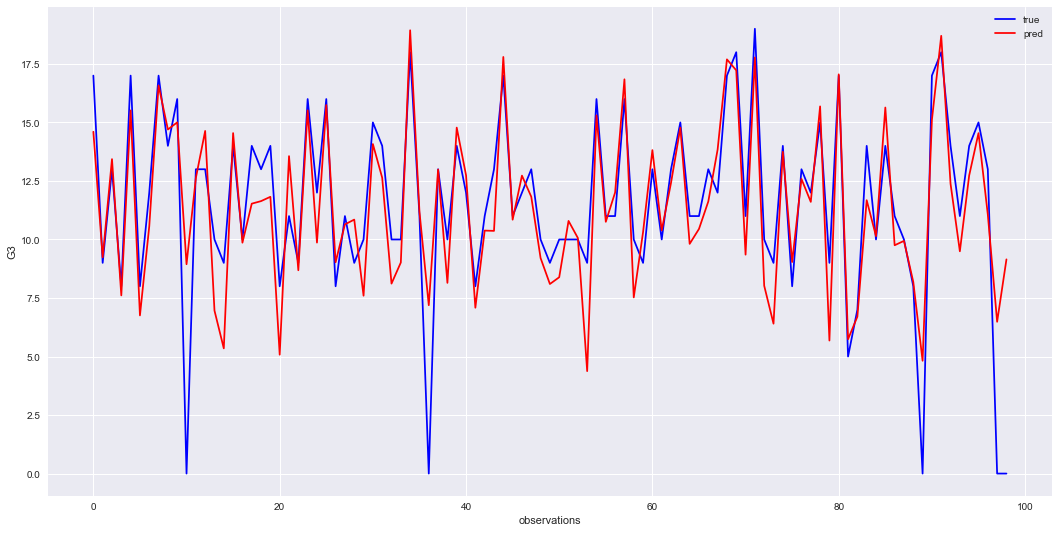

In [111]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

In [112]:
from sklearn import metrics

In [113]:
def metric (y_test, y_pred):
    MSE = metrics.mean_squared_error(y_pred=y_pred, y_true=y_test)
    print('MSE: ', MSE)
    RMSE = np.sqrt(MSE)
    print('RMSE: ', RMSE)
    MAE = metrics.mean_absolute_error(y_pred=y_pred, y_true=y_test)
    print('MAE: ', MAE)
    R2 = metrics.r2_score(y_pred=y_pred, y_true=y_test)
    print('R2: ', R2)
    MedAE = metrics.median_absolute_error(y_pred=y_pred, y_true=y_test)
    print('MedAE: ', MedAE)

R2 = 1 - лучшее предсказание, R2 = 0 - плохая модель

In [114]:
metric(y_test, y_pred)

MSE:  4.3163798633970485
RMSE:  2.077589917042593
MAE:  1.4051084111474978
R2:  0.7085548348437686
MedAE:  0.9224681778970432


#### Гребневая регрессия

In [115]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [116]:
y_pred = ridge.predict(X_test)
metric(y_test, y_pred)

MSE:  4.314546941107734
RMSE:  2.0771487527636854
MAE:  1.4048819204971388
R2:  0.7086785951142345
MedAE:  0.9228170765092472


In [117]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

metric(y_test, y_pred)

MSE:  4.3019881780645886
RMSE:  2.0741234722322073
MAE:  1.4031260441704214
R2:  0.7095265720961277
MedAE:  0.8971637278866815


In [118]:
ridge = linear_model.Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

metric(y_test, y_pred)

MSE:  4.299054540059459
RMSE:  2.0734161521651795
MAE:  1.3971078254719917
R2:  0.7097246535069329
MedAE:  0.9223151885502556


In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
ridge = linear_model.RidgeCV(alphas=np.array(range(0,1000,1)) / 10, 
                                  cv=5,
                                 scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize

In [121]:
ridge.alpha_

83.5

In [122]:
y_pred = ridge.predict(X_test)

metric(y_test, y_pred)

MSE:  4.293725230175666
RMSE:  2.072130601621352
MAE:  1.397240546987237
R2:  0.7100844924572585
MedAE:  0.9074058023149867


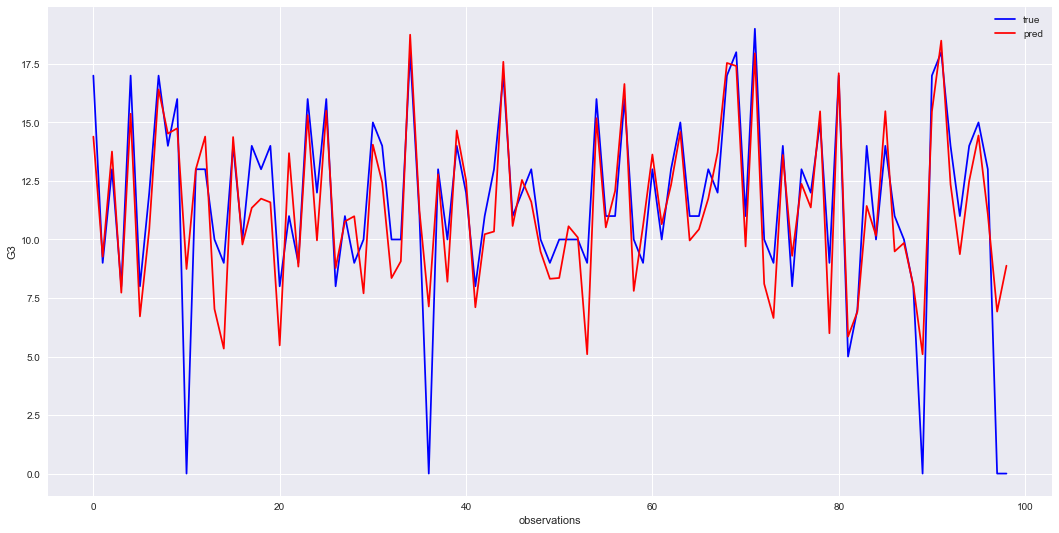

In [123]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Лассо

In [126]:
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
metric(y_test, y_pred)

MSE:  4.257994440357435
RMSE:  2.063490838447662
MAE:  1.394611920389282
R2:  0.7124970618485773
MedAE:  0.8930992413556584


In [127]:
lasso = linear_model.LassoCV(alphas=np.array(range(0,2000,1)) / 1000, 
                                  cv=5)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [128]:
lasso.alpha_

0.061

In [129]:
y_pred = lasso.predict(X_test)

metric(y_test, y_pred)

MSE:  4.2029213329818615
RMSE:  2.0501027615663223
MAE:  1.3914591539963528
R2:  0.7162156388465963
MedAE:  0.8771045019776551


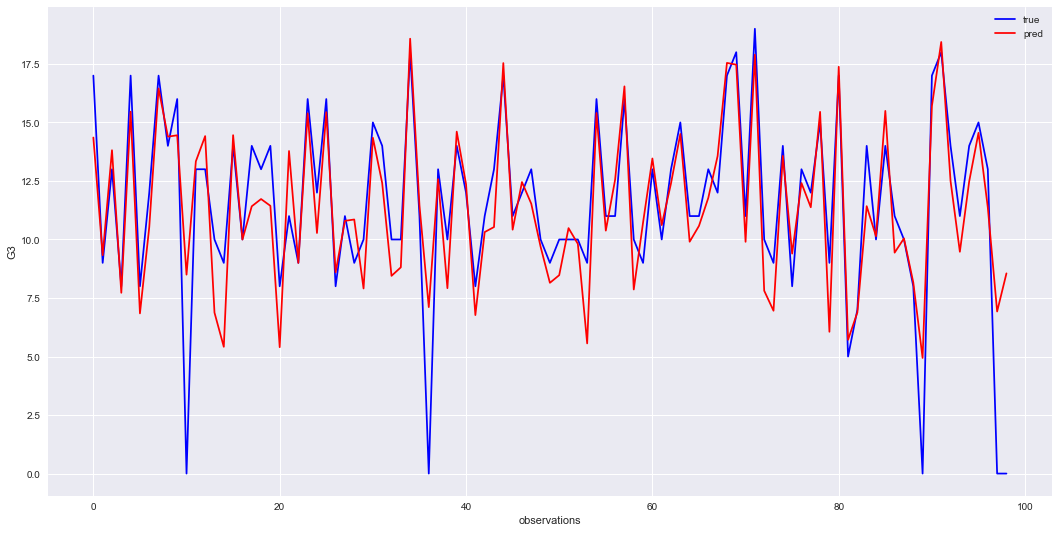

In [130]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### KNN

In [131]:
from sklearn import preprocessing

In [132]:
standard_data = data.copy()

In [133]:
standard_data.iloc[:,1:] = preprocessing.scale(standard_data.iloc[:,1:])

In [134]:
standard_data.mean(axis=0).round(3)

Subject       0.622
school        0.000
age           0.000
address      -0.000
Medu          0.000
Fedu          0.000
Mjob          0.000
reason       -0.000
traveltime   -0.000
studytime     0.000
failures     -0.000
higher        0.000
internet     -0.000
G1           -0.000
G2            0.000
G3           -0.000
Alc           0.000
dtype: float64

In [135]:
standard_data.std(axis=0).round(3)

Subject       0.485
school        1.000
age           1.000
address       1.000
Medu          1.000
Fedu          1.000
Mjob          1.000
reason        1.000
traveltime    1.000
studytime     1.000
failures      1.000
higher        1.000
internet      1.000
G1            1.000
G2            1.000
G3            1.000
Alc           1.000
dtype: float64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(standard_data.drop(['G3', 'G2'], axis=1), standard_data['G3'])

In [137]:
from sklearn.neighbors import KNeighborsRegressor

In [138]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [139]:
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  0.578873299621658
RMSE:  0.760837235958952
MAE:  0.5465031048154898
R2:  0.41300266545364606
MedAE:  0.4314498195911762


In [140]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  0.5160305563164199
RMSE:  0.718352668482842
MAE:  0.517541415776266
R2:  0.47672735760971074
MedAE:  0.4141918268075291


In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
n_neighbors = range (1, 51)
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors})
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

14

In [143]:
KNN = KNeighborsRegressor(n_neighbors=14)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  0.4925100277417673
RMSE:  0.7017905868147329
MAE:  0.49209366943847455
R2:  0.5005779784441249
MedAE:  0.3513234245242435


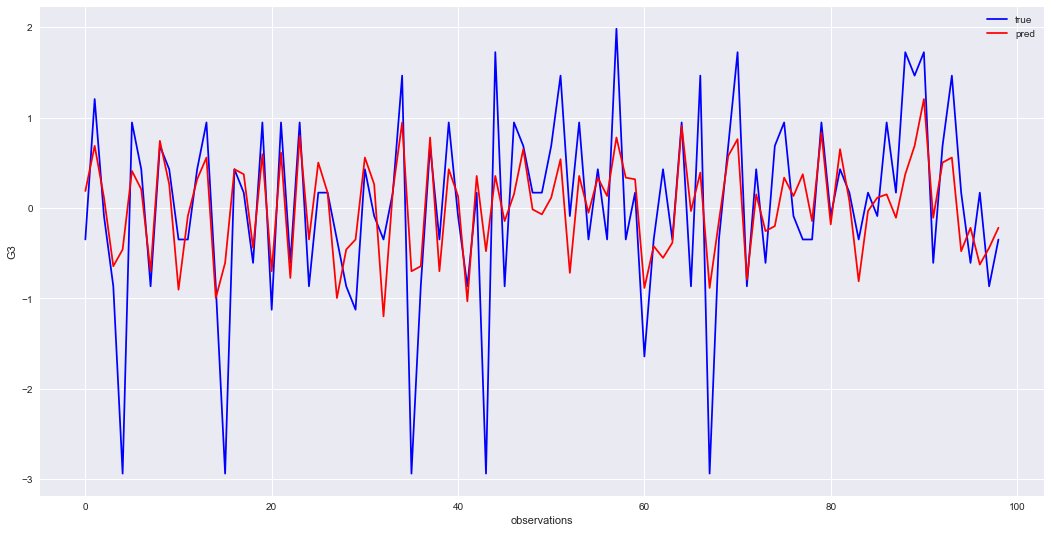

In [144]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

In [145]:
n_neighbors = range (1, 51)
knn = KNeighborsRegressor(metric = "cosine")
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors})
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

9

In [146]:
KNN = KNeighborsRegressor(n_neighbors=9, metric = "cosine")
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  0.49080242114412764
RMSE:  0.7005729235019917
MAE:  0.5074907839635674
R2:  0.5023095499675021
MedAE:  0.37392317697901933


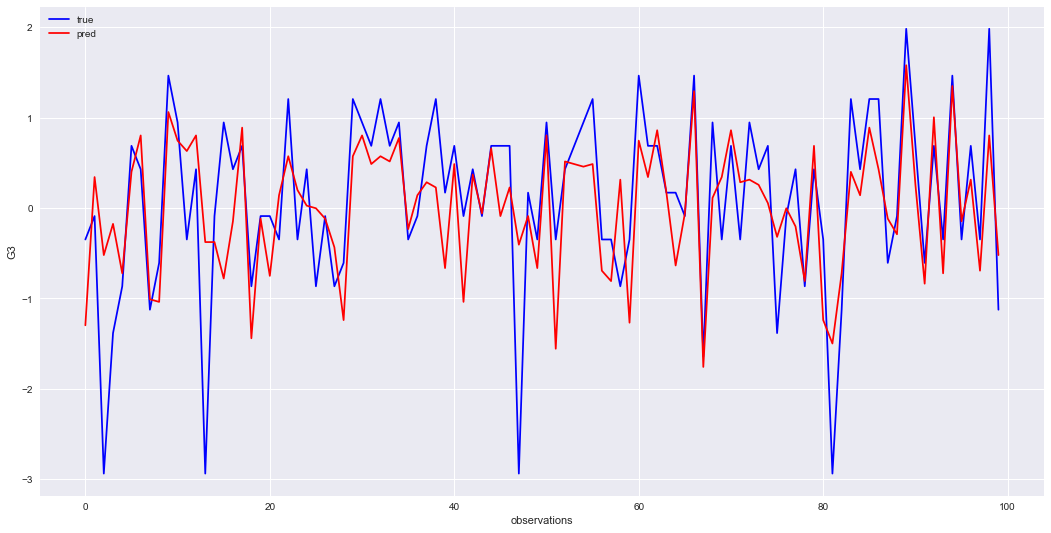

In [147]:
plt.figure(figsize=(18,9))
plt.plot(y_test[100:200].values, 'b-', label='true')
plt.plot(y_pred[100:200], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Radius Neighbors

In [148]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [149]:
RNR = RadiusNeighborsRegressor(radius=5)
RNR.fit(X_train, y_train)
y_pred = RNR.predict(X_test)

In [150]:
np.unique(np.isnan(y_pred), axis=0)

array([False])

In [151]:
metric(y_test, y_pred)

MSE:  0.7154595633266898
RMSE:  0.8458484281044032
MAE:  0.6105401007316048
R2:  0.2744995201489643
MedAE:  0.462589241352974


In [152]:
RNR = RadiusNeighborsRegressor(radius=5, metric = "canberra")
RNR.fit(X_train, y_train)
y_pred = RNR.predict(X_test)
np.unique(np.isnan(y_pred), axis=0)

array([False])

In [153]:
metric(y_test, y_pred)

MSE:  0.6139197819195266
RMSE:  0.7835303324821105
MAE:  0.5430242073590743
R2:  0.3774643331320129
MedAE:  0.3707543364961463


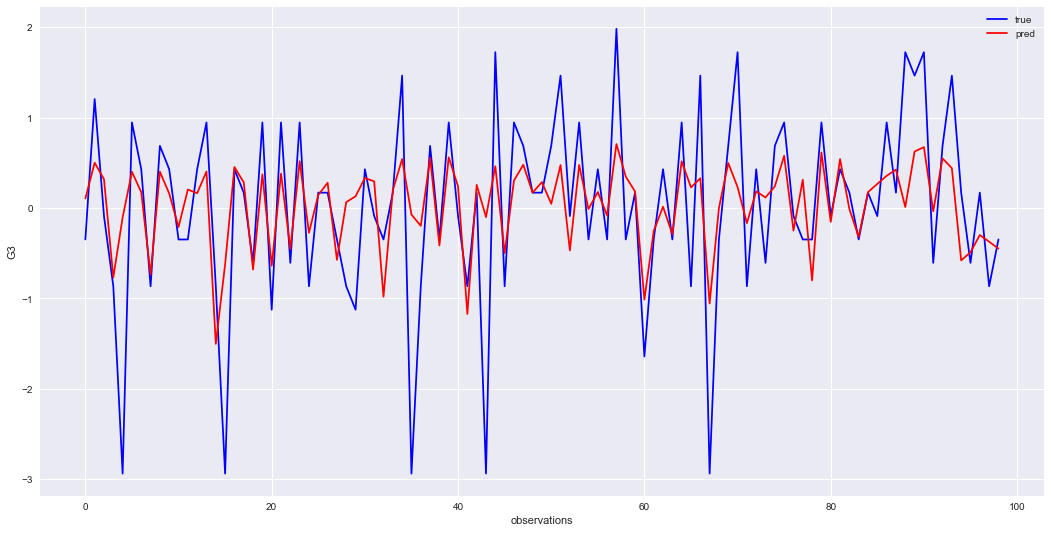

In [154]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
RF = RandomForestRegressor(max_depth=10, random_state=3, n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
metric(y_test, y_pred)

MSE:  0.3865051519594567
RMSE:  0.6216953851843012
MAE:  0.4244167201830153
R2:  0.6080705499166779
MedAE:  0.3058890740262804


In [157]:
RF = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=45)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
metric(y_test, y_pred)

MSE:  0.3405280335587553
RMSE:  0.5835477988637737
MAE:  0.3946626387175819
R2:  0.6546929212870158
MedAE:  0.2900261070341901


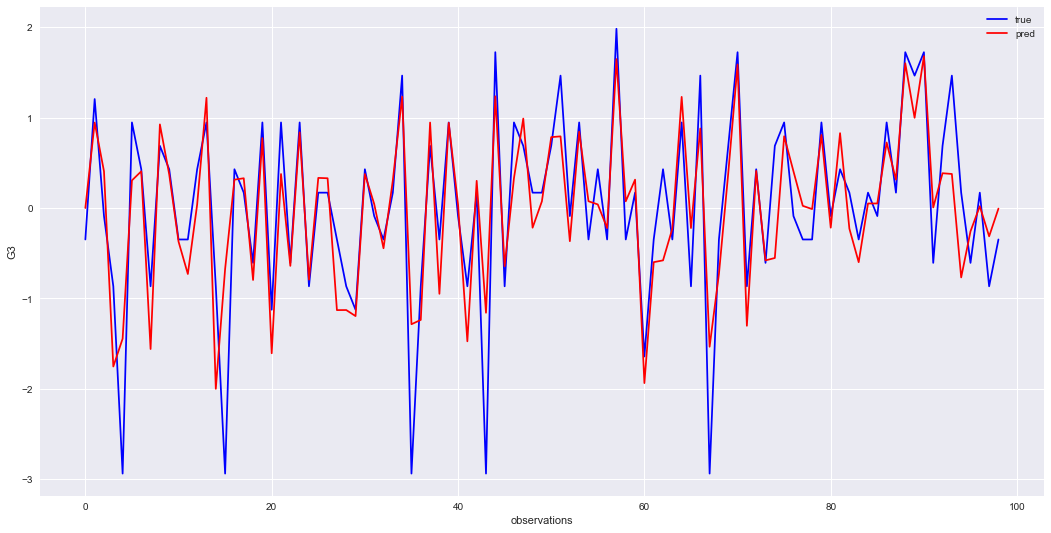

In [158]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

### БЕЗ G1

In [159]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G3', 'G2', 'G1'], axis=1), data['G3'])

In [160]:
X_train.shape

(783, 14)

In [161]:
X_test.shape

(261, 14)

In [162]:
y_train.shape

(783,)

In [163]:
y_test.shape

(261,)

#### Линейная регрессия

In [164]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
y_pred = linear.predict(X_test)
metric(y_test, y_pred)

MSE:  9.902261533123593
RMSE:  3.1467859051933598
MAE:  2.380634625304215
R2:  0.25367881131321135
MedAE:  1.8938737739472078


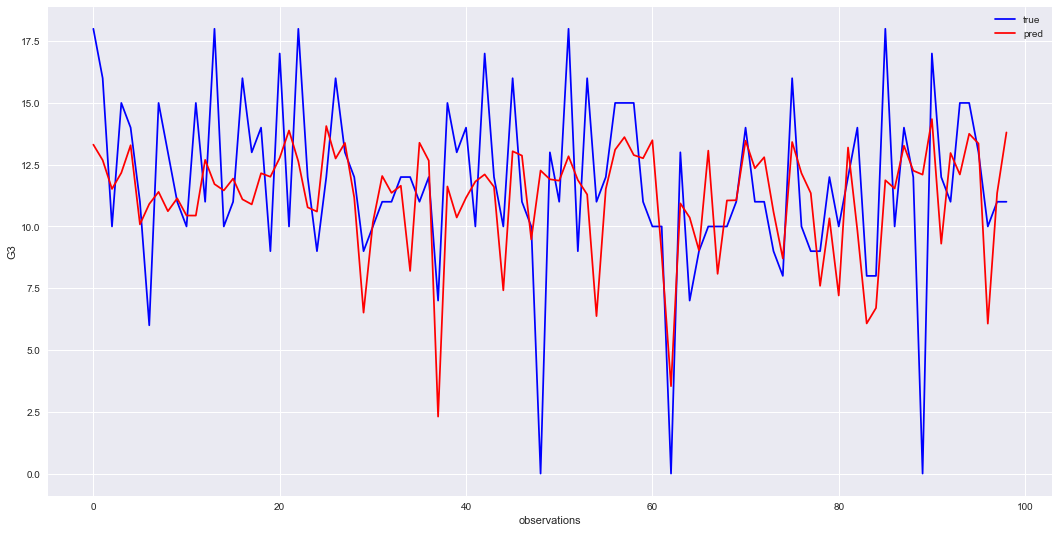

In [166]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Гребневая регрессия

In [167]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [168]:
y_pred = ridge.predict(X_test)
metric(y_test, y_pred)

MSE:  9.88736177669917
RMSE:  3.1444175576248092
MAE:  2.377295432253445
R2:  0.2548017875029053
MedAE:  1.8791519962962138


In [169]:
ridge = linear_model.Ridge(alpha=9)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
metric(y_test, y_pred)

MSE:  9.799807168052938
RMSE:  3.130464369395208
MAE:  2.357235775553729
R2:  0.26140066992802424
MedAE:  1.8104152493994299


In [170]:
ridge = linear_model.RidgeCV(alphas=np.array(range(0,1000,1)) / 10, 
                                  cv=5,
                                 scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
ridge.alpha_

6.5

In [171]:
y_pred = ridge.predict(X_test)

metric(y_test, y_pred)

MSE:  9.822149064678818
RMSE:  3.1340308014885268
MAE:  2.362662524088605
R2:  0.2597167888477713
MedAE:  1.8122538802282406


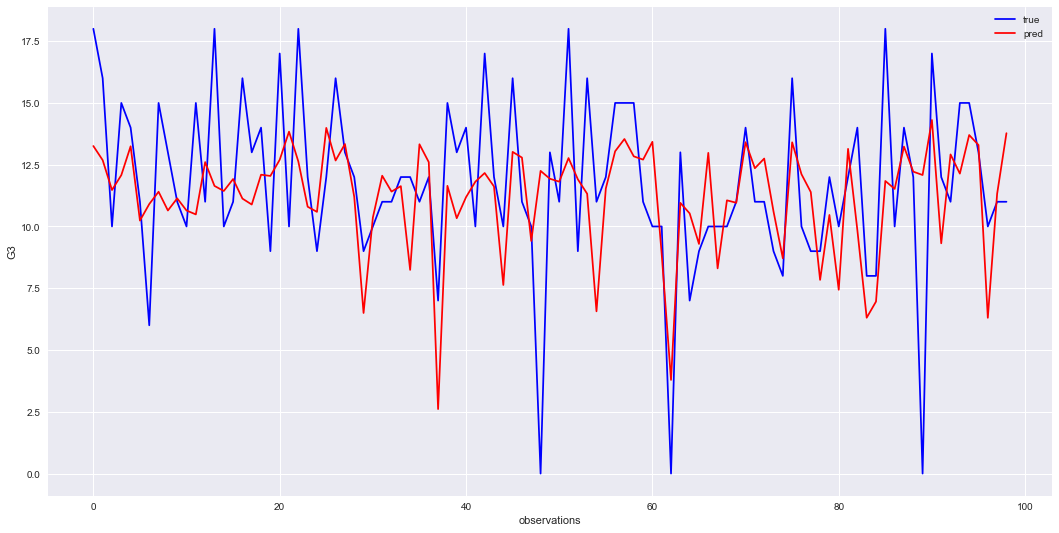

In [172]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Лассо-регрессия

In [173]:
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
metric(y_test, y_pred)

MSE:  9.847059719314696
RMSE:  3.1380025046699207
MAE:  2.3699907283388026
R2:  0.25783930365748153
MedAE:  1.8604606887915587


In [174]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
metric(y_test, y_pred)

MSE:  9.80712138454773
RMSE:  3.131632383366178
MAE:  2.3292112185220937
R2:  0.2608494064888144
MedAE:  1.7241576208657818


In [175]:
lasso = linear_model.LassoCV(alphas=np.array(range(0,1000,1)) / 10000, 
                                  cv=5)
lasso.fit(X_train, y_train)
lasso.alpha_

0.0147

In [176]:
y_pred = lasso.predict(X_test)

metric(y_test, y_pred)

MSE:  9.826522641275506
RMSE:  3.1347284796734
MAE:  2.3659658000265
R2:  0.259387157795962
MedAE:  1.8498057970175932


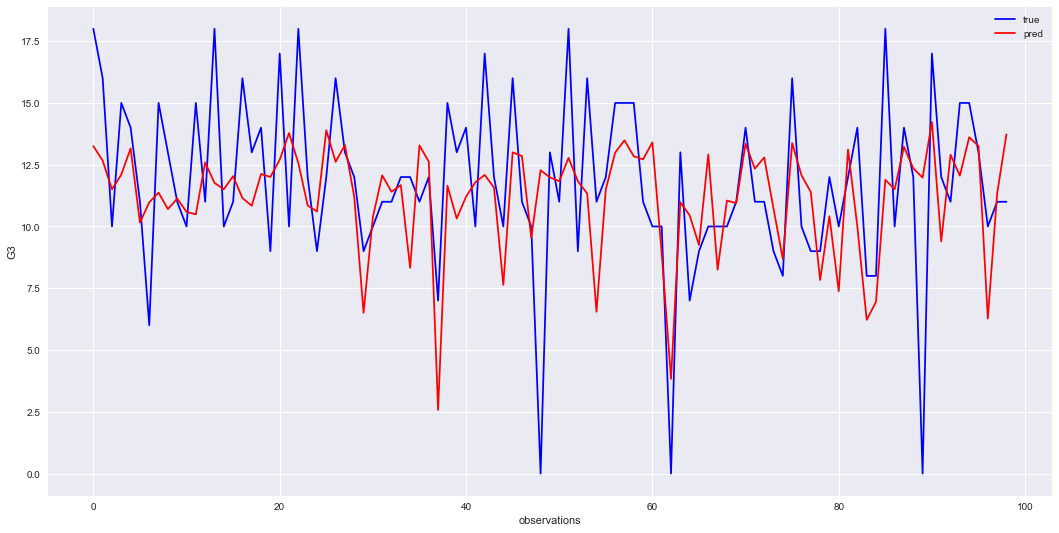

In [177]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### KNN

In [178]:
X_train, X_test, y_train, y_test = train_test_split(standard_data.drop(['G3', 'G2', 'G1'], axis=1), standard_data['G3'])

In [179]:
KNN = KNeighborsRegressor(n_neighbors=4)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  1.0019146116409492
RMSE:  1.0009568480413875
MAE:  0.694535025675221
R2:  0.029597004480083622
MedAE:  0.5177397835094113


In [180]:
n_neighbors = range (4, 51)
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors})
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

30

In [181]:
KNN = KNeighborsRegressor(n_neighbors=30)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  0.8818547459035517
RMSE:  0.9390712145005573
MAE:  0.6489931002739301
R2:  0.14588081948750586
MedAE:  0.4400788159829997


In [182]:
n_neighbors = range (4, 51)
knn = KNeighborsRegressor(metric = "cosine")
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors})
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

25

In [183]:
KNN = KNeighborsRegressor(n_neighbors=25, metric = "cosine")
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
metric(y_test, y_pred)

MSE:  0.8865019821764041
RMSE:  0.9415423422111212
MAE:  0.6512412679162444
R2:  0.14137974529648412
MedAE:  0.45561100948828204


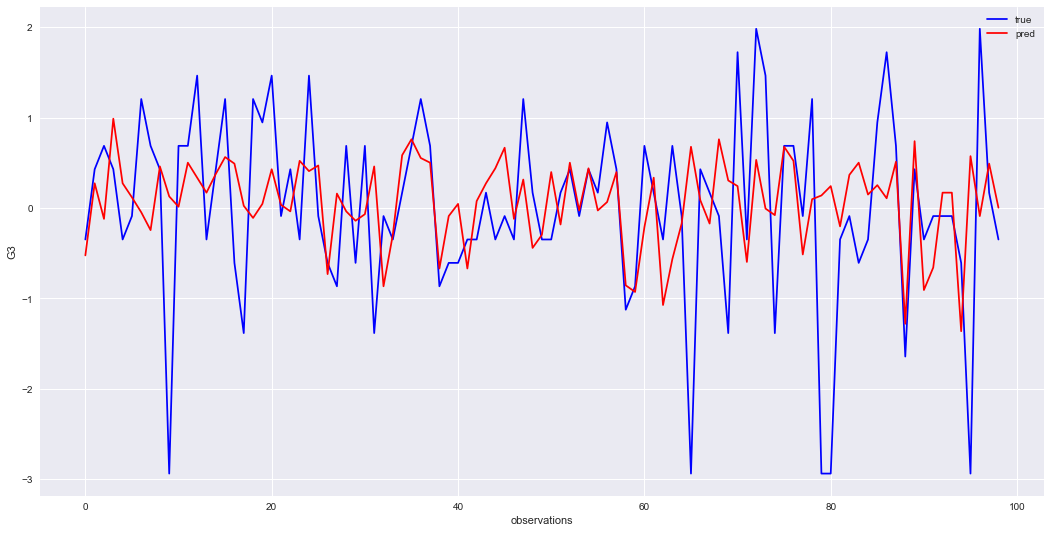

In [184]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Radius Neighbors

In [186]:
RNR = RadiusNeighborsRegressor(radius=5)
RNR.fit(X_train, y_train)
y_pred = RNR.predict(X_test)
np.unique(np.isnan(y_pred), axis=0)

array([False])

In [187]:
metric(y_test, y_pred)

MSE:  0.916164625924123
RMSE:  0.957164889621492
MAE:  0.6806560250919111
R2:  0.11265003318989797
MedAE:  0.4851162455959706


In [188]:
RNR = RadiusNeighborsRegressor(radius=6)
RNR.fit(X_train, y_train)
y_pred = RNR.predict(X_test)
np.unique(np.isnan(y_pred), axis=0)

array([False])

In [189]:
metric(y_test, y_pred)

MSE:  0.9706265240669264
RMSE:  0.9852037982402049
MAE:  0.7075955422826906
R2:  0.05990103793079238
MedAE:  0.49769454852840544


In [190]:
RNR = RadiusNeighborsRegressor(radius=5, metric = "canberra")
RNR.fit(X_train, y_train)
y_pred = RNR.predict(X_test)
np.unique(np.isnan(y_pred), axis=0)

array([False])

In [191]:
metric(y_test, y_pred)

MSE:  0.875487419064569
RMSE:  0.9356748468696638
MAE:  0.6587267168844797
R2:  0.15204788499010735
MedAE:  0.453022310570735


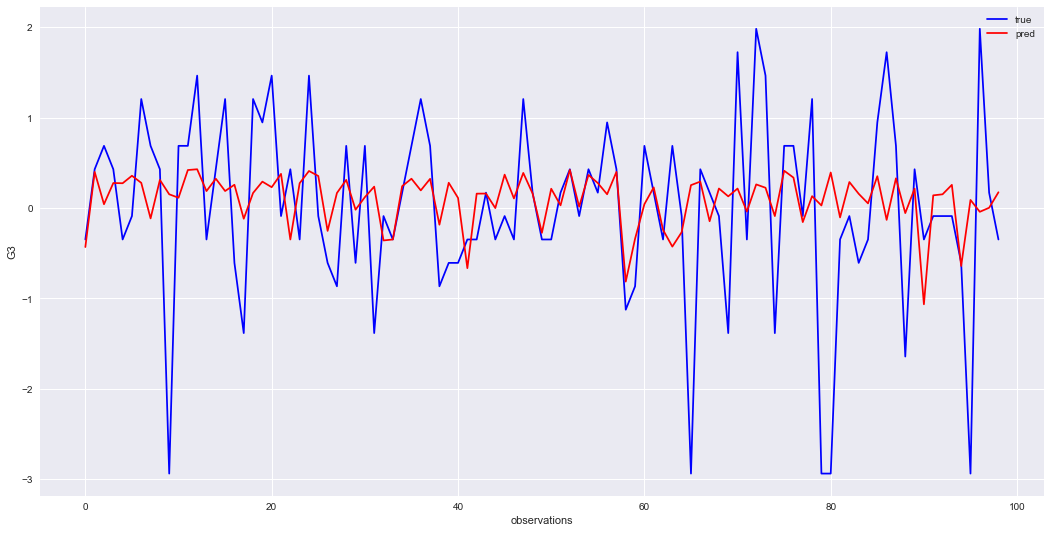

In [192]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

#### Random Forest

In [193]:
RF = RandomForestRegressor(max_depth=10, random_state=3, n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
metric(y_test, y_pred)

MSE:  0.8425806806289785
RMSE:  0.9179219360212384
MAE:  0.6645378486451716
R2:  0.1839196604684461
MedAE:  0.4715215866480016


In [194]:
RF = RandomForestRegressor(max_depth=5, random_state=3, n_estimators=50)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
metric(y_test, y_pred)

MSE:  0.8161721095549587
RMSE:  0.9034224424680619
MAE:  0.65109535363015
R2:  0.20949764503906476
MedAE:  0.48478142632801524


In [195]:
RF = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
metric(y_test, y_pred)

MSE:  0.8218349001446217
RMSE:  0.9065511017833587
MAE:  0.6539845056807568
R2:  0.20401295713516154
MedAE:  0.4842407473601


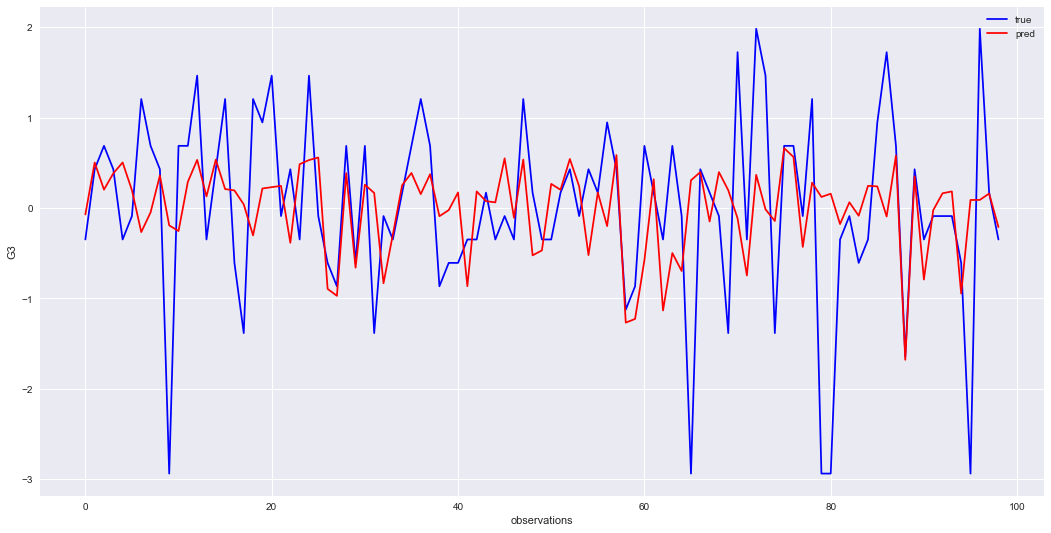

In [196]:
plt.figure(figsize=(18,9))
plt.plot(y_test[1:100].values, 'b-', label='true')
plt.plot(y_pred[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

Вывод: Лучшая модель получилась у Random Forest.

# ЧАСТЬ 3

### Бинарная классификация

In [197]:
data.head()

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc
0,1,0,16,1,3,4,3,0,1,1,0,1,1,15,13,14,2
1,1,0,17,1,3,2,2,0,1,2,0,1,1,17,18,17,2
2,1,0,16,1,1,2,1,0,2,1,2,1,1,9,8,10,4
3,1,1,17,1,2,3,2,1,2,2,0,1,1,14,15,16,1
4,1,0,16,1,1,1,0,1,2,1,0,1,0,12,13,13,2


In [198]:
data['passed'] = None

for index, row in data.iterrows():
    if (data.at[index, 'G3'] < 8):
        data.at[index, 'passed'] = 0
    else:
        data.at[index, 'passed'] = 1

data.head()  

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc,passed
0,1,0,16,1,3,4,3,0,1,1,0,1,1,15,13,14,2,1
1,1,0,17,1,3,2,2,0,1,2,0,1,1,17,18,17,2,1
2,1,0,16,1,1,2,1,0,2,1,2,1,1,9,8,10,4,1
3,1,1,17,1,2,3,2,1,2,2,0,1,1,14,15,16,1,1
4,1,0,16,1,1,1,0,1,2,1,0,1,0,12,13,13,2,1


In [199]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G1', 'G2', 'G3', 'passed'], axis=1), data['passed'])

In [200]:
y_train.value_counts(normalize=True)

1    0.909323
0    0.090677
Name: passed, dtype: float64

In [201]:
y_test.value_counts(normalize=True)

1    0.888889
0    0.111111
Name: passed, dtype: float64

#### KNN

In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
def accuracy(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [205]:
y_train = y_train.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')
y_test = y_test.astype('int')

In [206]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)

Accuracy:  0.8773946360153256


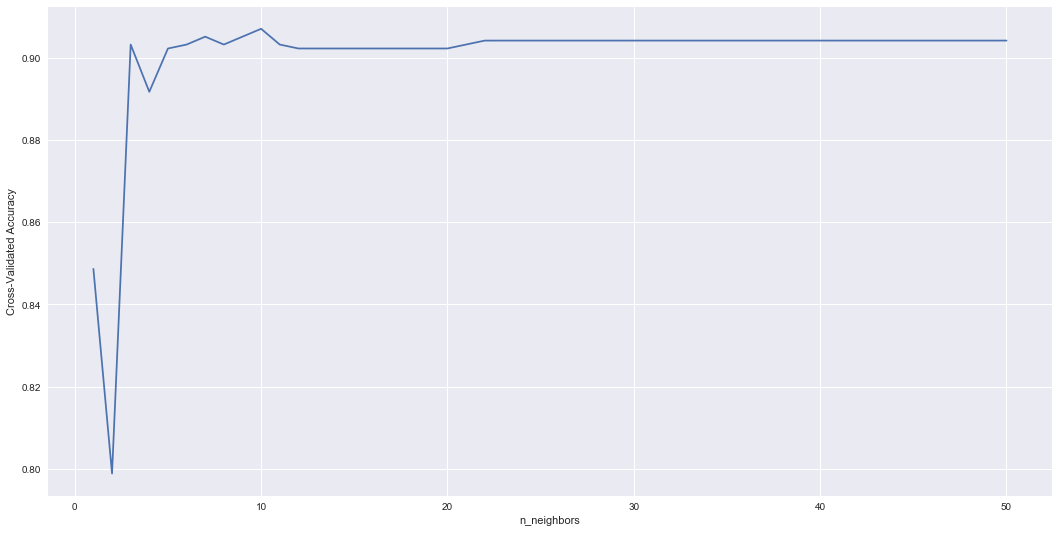

In [207]:
from sklearn.model_selection import cross_val_score
k_scores = []
for i in range (1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    k_scores.append(cross_val_score(knn, data.drop(['G1', 'G2', 'G3', 'passed'], axis=1).astype('int'), data['passed'].astype('int'), cv=5, scoring='accuracy').mean())

plt.figure(figsize=(18,9))                    
plt.plot(range(1,51), k_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

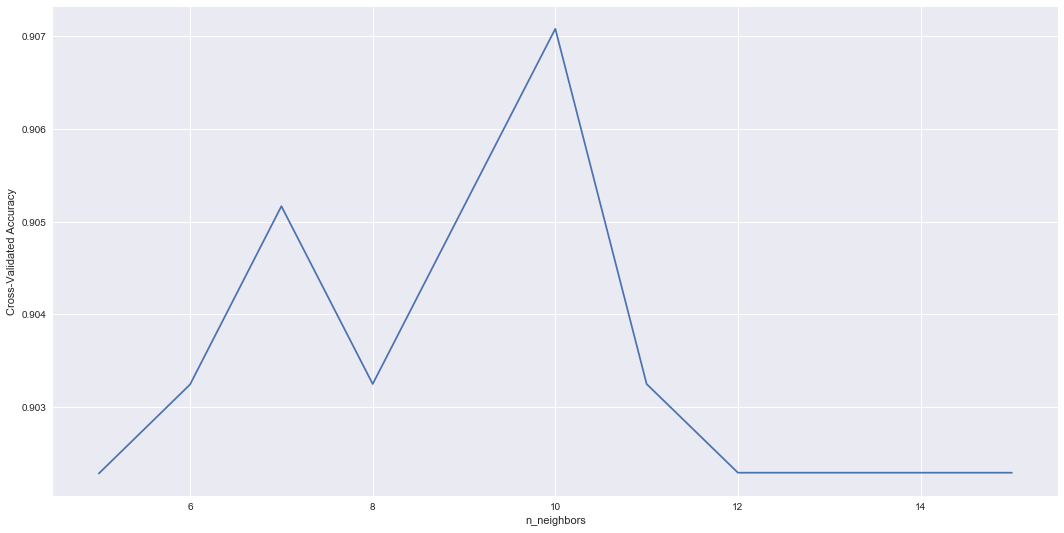

In [208]:
plt.figure(figsize=(18,9))                    
plt.plot(range(5,16), k_scores[4:15])
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [209]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)

Accuracy:  0.8812260536398467


In [210]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.89      0.99      0.94       232

    accuracy                           0.88       261
   macro avg       0.44      0.50      0.47       261
weighted avg       0.79      0.88      0.83       261



In [211]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

6

In [212]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.896551724137931
              precision    recall  f1-score   support

           0       0.62      0.17      0.27        29
           1       0.91      0.99      0.94       232

    accuracy                           0.90       261
   macro avg       0.77      0.58      0.61       261
weighted avg       0.87      0.90      0.87       261



In [213]:
from sklearn.metrics import confusion_matrix
import pylab as pl

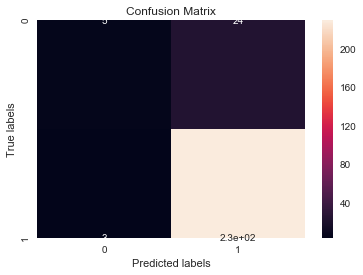

In [214]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Похоже на переобучение

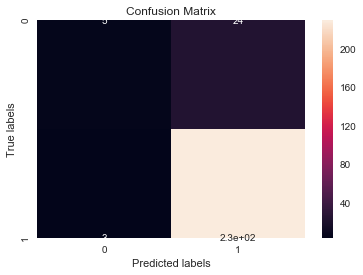

In [215]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [216]:
standard_data = data.copy()
standard_data.head()

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc,passed
0,1,0,16,1,3,4,3,0,1,1,0,1,1,15,13,14,2,1
1,1,0,17,1,3,2,2,0,1,2,0,1,1,17,18,17,2,1
2,1,0,16,1,1,2,1,0,2,1,2,1,1,9,8,10,4,1
3,1,1,17,1,2,3,2,1,2,2,0,1,1,14,15,16,1,1
4,1,0,16,1,1,1,0,1,2,1,0,1,0,12,13,13,2,1


In [217]:
standard_data.iloc[:, :-1] = preprocessing.scale(standard_data.iloc[:, :-1])
standard_data.head()

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc,passed
0,0.780147,-0.593575,-0.585820,0.612776,0.352689,1.466302,0.781392,-0.972986,-0.715074,-1.163502,-0.403106,0.305276,0.512244,1.269766,0.534135,0.688088,0.049313,1
1,0.780147,-0.593575,0.221035,0.612776,0.352689,-0.352853,-0.022325,-0.972986,-0.715074,0.035606,-0.403106,0.305276,0.512244,1.940465,2.056902,1.464698,0.049313,1
2,0.780147,-0.593575,-0.585820,0.612776,-1.426089,-0.352853,-0.826043,-0.972986,0.652210,-1.163502,2.646477,0.305276,0.512244,-0.742330,-0.988631,-0.347391,2.068249,1
3,0.780147,1.684706,0.221035,0.612776,-0.536700,0.556724,-0.022325,-0.138998,0.652210,0.035606,-0.403106,0.305276,0.512244,0.934417,1.143242,1.205828,-0.960155,1
4,0.780147,-0.593575,-0.585820,0.612776,-1.426089,-1.262431,-1.629761,-0.138998,0.652210,-1.163502,-0.403106,0.305276,-1.952194,0.263718,0.534135,0.429218,0.049313,1


In [218]:
standard_data.mean(axis=0).round(3)

Subject      -0.000
school        0.000
age           0.000
address      -0.000
Medu          0.000
Fedu          0.000
Mjob          0.000
reason       -0.000
traveltime   -0.000
studytime     0.000
failures     -0.000
higher        0.000
internet     -0.000
G1           -0.000
G2            0.000
G3           -0.000
Alc           0.000
passed        0.904
dtype: float64

In [219]:
standard_data.std(axis=0).round(3)

Subject       1.000
school        1.000
age           1.000
address       1.000
Medu          1.000
Fedu          1.000
Mjob          1.000
reason        1.000
traveltime    1.000
studytime     1.000
failures      1.000
higher        1.000
internet      1.000
G1            1.000
G2            1.000
G3            1.000
Alc           1.000
passed        0.294
dtype: float64

In [220]:
X_train, X_test, y_train, y_test = train_test_split(standard_data.drop(['G1', 'G2', 'G3', 'passed'], axis=1), standard_data['passed'])

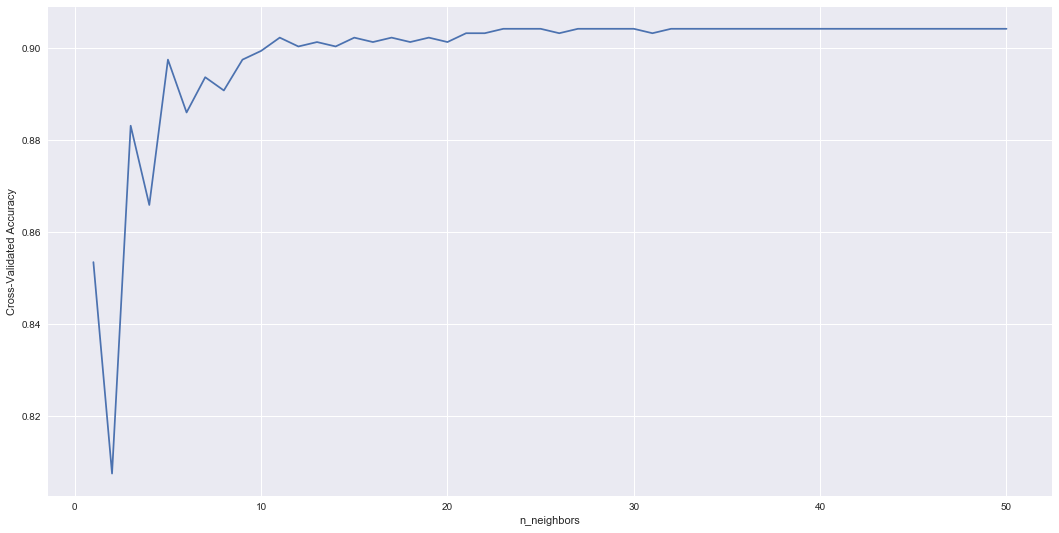

In [221]:
k_scores = []
for i in range (1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    k_scores.append(cross_val_score(knn, standard_data.drop(['G1', 'G2', 'G3', 'passed'], axis=1).astype('int'), standard_data['passed'].astype('int'), cv=5, scoring='accuracy').mean())

plt.figure(figsize=(18,9))                    
plt.plot(range(1,51), k_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

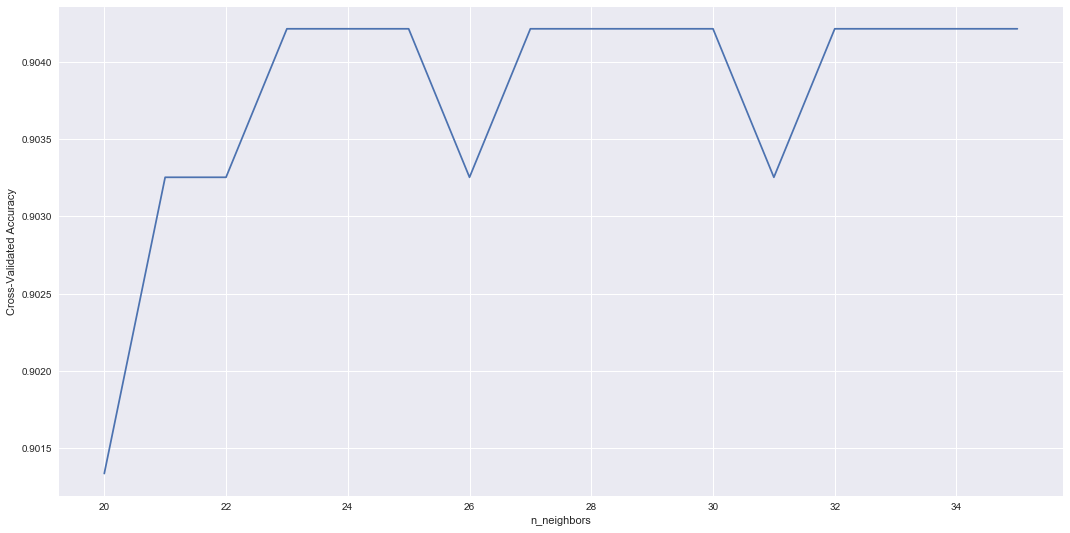

In [222]:
plt.figure(figsize=(18,9))                    
plt.plot(range(20,36), k_scores[19:35])
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show() 

In [223]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [224]:
KNN = KNeighborsClassifier(n_neighbors=23)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.9195402298850575
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.92      1.00      0.96       241

    accuracy                           0.92       261
   macro avg       0.46      0.50      0.48       261
weighted avg       0.85      0.92      0.88       261



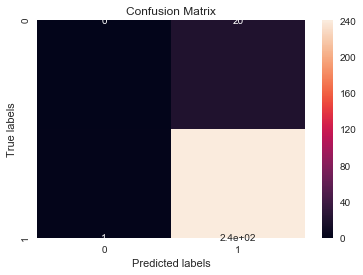

In [225]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Переобучение

In [227]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.4979253112033195

#### Логистическая регрессия

In [228]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G1', 'G2', 'G3', 'passed'], axis=1), data['passed'])

In [229]:
y_train = y_train.astype('int')
X_train = X_train.astype('int')
X_test = X_test.astype('int')
y_test = y_test.astype('int')

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
log_reg = LogisticRegression(max_iter = 10000, C=0.1)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.9118773946360154
              precision    recall  f1-score   support

           0       0.33      0.05      0.08        22
           1       0.92      0.99      0.95       239

    accuracy                           0.91       261
   macro avg       0.63      0.52      0.52       261
weighted avg       0.87      0.91      0.88       261



In [232]:
confusion_matrix(y_test, y_pred)

array([[  1,  21],
       [  2, 237]])

In [233]:
log_reg = LogisticRegression(max_iter = 10000, C=1)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.9080459770114943
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        22
           1       0.92      0.98      0.95       239

    accuracy                           0.91       261
   macro avg       0.63      0.54      0.55       261
weighted avg       0.87      0.91      0.88       261



array([[  2,  20],
       [  4, 235]])

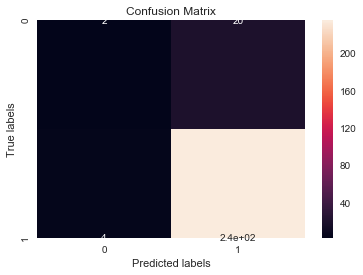

In [234]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [235]:
roc_auc_score(y_test, y_pred)

0.5370863446177253

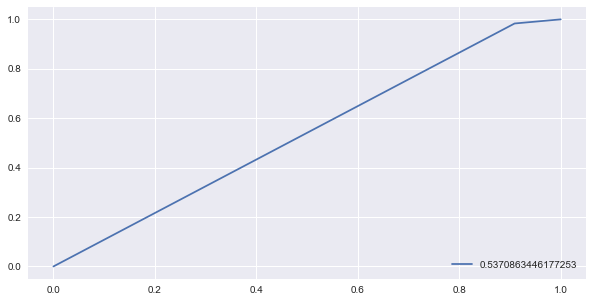

In [236]:
auc = metrics.roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10,5))  
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label=str(auc))
plt.legend(loc=4)
plt.show()

#### Дерево решений

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=3, max_features='auto')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print('roc auc:', roc_auc_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.8850574712643678
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.91      0.97      0.94       239

    accuracy                           0.89       261
   macro avg       0.46      0.48      0.47       261
weighted avg       0.84      0.89      0.86       261

roc auc: 0.48326359832635984


array([[  0,  22],
       [  8, 231]])

In [241]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [242]:
dtree_model = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 21),
          'min_samples_split': np.arange(2, 21),
          'min_samples_leaf': np.arange(1, 21)}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
clf = GridSearchCV(dtree_model, params, cv=rskf, scoring='f1_micro', n_jobs=-1)

clf.fit(data.drop(['G1', 'G2', 'G3', 'passed'], axis=1).astype('int'),
        data['passed'].astype('int'))

clf.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [243]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=2, min_samples_leaf=1, max_features='auto')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.9157088122605364
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.92      1.00      0.96       239

    accuracy                           0.92       261
   macro avg       0.46      0.50      0.48       261
weighted avg       0.84      0.92      0.88       261



array([[  0,  22],
       [  0, 239]])

Переобучение

In [245]:
dtree_model = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 11),
          'min_samples_split': np.arange(2, 16),
          'min_samples_leaf': np.arange(1, 11)}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
clf = GridSearchCV(dtree_model, params, cv=rskf, scoring='f1_macro', n_jobs=-1)

clf.fit(data.drop(['G1', 'G2', 'G3', 'passed'], axis=1).astype('int'),
        data['passed'].astype('int'))

clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [246]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=4, min_samples_leaf=4, max_features='auto')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print('roc auc:', roc_auc_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.9042145593869731
              precision    recall  f1-score   support

           0       0.38      0.23      0.29        22
           1       0.93      0.97      0.95       239

    accuracy                           0.90       261
   macro avg       0.66      0.60      0.62       261
weighted avg       0.89      0.90      0.89       261

roc auc: 0.5968999619627235


array([[  5,  17],
       [  8, 231]])

In [248]:
dtree_model = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 11),
          'min_samples_split': np.arange(2, 16),
          'min_samples_leaf': np.arange(1, 11)}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
clf = GridSearchCV(dtree_model, params, cv=rskf, scoring='f1_macro', n_jobs=-1)

clf.fit(data.drop(['G1', 'G2', 'G3', 'passed'], axis=1).astype('int'),
        data['passed'].astype('int'))

clf.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [249]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5, min_samples_leaf=2, max_features='auto')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
print('roc auc:', roc_auc_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.8850574712643678
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        22
           1       0.92      0.96      0.94       239

    accuracy                           0.89       261
   macro avg       0.54      0.52      0.53       261
weighted avg       0.86      0.89      0.87       261

roc auc: 0.5245340433624952


array([[  2,  20],
       [ 10, 229]])

Вывод: Все получившиеся модели склонны к переобучению, что обусловлено тем фактом, что слишком большое количество сдавших по сравнению с количеством несдавших (несдавшие как бы выбросы, что ли). Из рассмотренных моделей лучше всего себя проявили логистическая регрессия и дерево решений.

### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

In [250]:
data.head()

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc,passed
0,1,0,16,1,3,4,3,0,1,1,0,1,1,15,13,14,2,1
1,1,0,17,1,3,2,2,0,1,2,0,1,1,17,18,17,2,1
2,1,0,16,1,1,2,1,0,2,1,2,1,1,9,8,10,4,1
3,1,1,17,1,2,3,2,1,2,2,0,1,1,14,15,16,1,1
4,1,0,16,1,1,1,0,1,2,1,0,1,0,12,13,13,2,1


In [251]:
data['Mark'] = None
for index, row in data.iterrows():
    if (data.at[index, 'G3'] < 8):
        data.at[index, 'Mark'] = 1
    if (data.at[index, 'G3'] <= 13 and data.at[index, 'G3'] >=8 ):
        data.at[index, 'Mark'] = 2   
    if (data.at[index, 'G3'] <= 17 and data.at[index, 'G3'] >=14 ):
        data.at[index, 'Mark'] = 3   
    if (data.at[index, 'G3'] <= 20 and data.at[index, 'G3'] >=18 ):
        data.at[index, 'Mark'] = 4 
data.head()

,Subject,school,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,G1,G2,G3,Alc,passed,Mark
0,1,0,16,1,3,4,3,0,1,1,0,1,1,15,13,14,2,1,3
1,1,0,17,1,3,2,2,0,1,2,0,1,1,17,18,17,2,1,3
2,1,0,16,1,1,2,1,0,2,1,2,1,1,9,8,10,4,1,2
3,1,1,17,1,2,3,2,1,2,2,0,1,1,14,15,16,1,1,3
4,1,0,16,1,1,1,0,1,2,1,0,1,0,12,13,13,2,1,2


In [252]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['G1', 'G2', 'G3', 'passed', 'Mark'], axis=1).astype('int'), data['Mark'].astype('int'))

In [253]:
y_train.value_counts(normalize=True)

2    0.625798
3    0.247765
1    0.093231
4    0.033206
Name: Mark, dtype: float64

In [254]:
y_test.value_counts(normalize=True)

2    0.613027
3    0.249042
1    0.103448
4    0.034483
Name: Mark, dtype: float64

#### KNN

In [259]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)

Accuracy:  0.5210727969348659


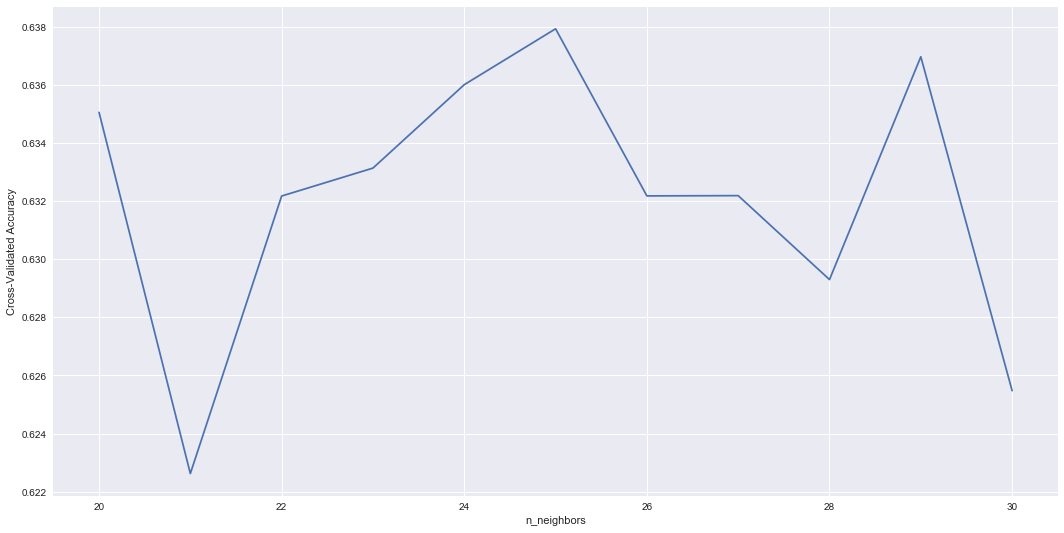

In [260]:
plt.figure(figsize=(18,9))                    
plt.plot(range(20,31), k_scores[19:30])
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Нужное значение равно 25

In [261]:
KNN = KNeighborsClassifier(n_neighbors=25)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)

Accuracy:  0.6245210727969349


In [262]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.65      0.93      0.76       160
           3       0.47      0.23      0.31        65
           4       0.00      0.00      0.00         9

    accuracy                           0.62       261
   macro avg       0.28      0.29      0.27       261
weighted avg       0.51      0.62      0.54       261



In [263]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_estimator_.n_neighbors

24

In [264]:
KNN = KNeighborsClassifier(n_neighbors=42)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.6053639846743295
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.63      0.93      0.75       160
           3       0.39      0.14      0.20        65
           4       0.00      0.00      0.00         9

    accuracy                           0.61       261
   macro avg       0.25      0.27      0.24       261
weighted avg       0.48      0.61      0.51       261



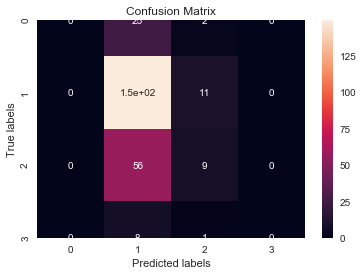

In [265]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Оценок 2 и 3 намного больше чем 1 и 4, поэтому ситуация объяснима

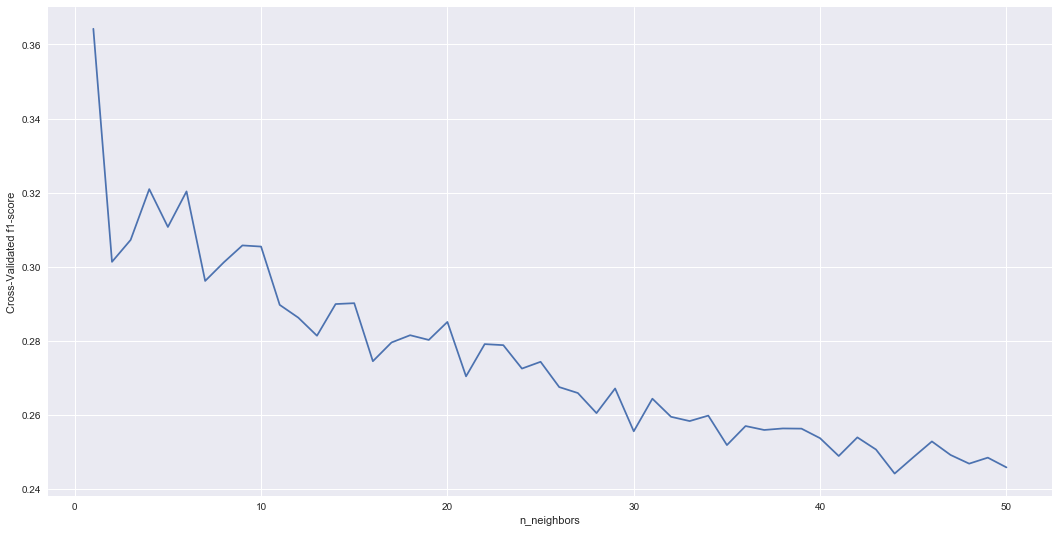

In [267]:
k_scores = []
for i in range (1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    k_scores.append(cross_val_score(knn, data.drop(['G1', 'G2', 'G3', 'passed', 'Mark'], axis=1).astype('int'), data['Mark'].astype('int'), cv=5, scoring='f1_macro').mean())

plt.figure(figsize=(18,9))                    
plt.plot(range(1,51), k_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Cross-Validated f1-score')
plt.show()

In [268]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.5095785440613027
              precision    recall  f1-score   support

           1       0.07      0.07      0.07        27
           2       0.65      0.61      0.63       160
           3       0.41      0.49      0.45        65
           4       0.40      0.22      0.29         9

    accuracy                           0.51       261
   macro avg       0.38      0.35      0.36       261
weighted avg       0.52      0.51      0.51       261



array([[ 2, 21,  4,  0],
       [24, 97, 39,  0],
       [ 2, 28, 32,  3],
       [ 1,  3,  3,  2]])

Немного угадывает 1 и 4

#### Логистическая регрессия

In [269]:
log_reg = LogisticRegression(max_iter = 10000, C=0.1)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.6398467432950191
              precision    recall  f1-score   support

           1       0.67      0.07      0.13        27
           2       0.64      0.95      0.77       160
           3       0.62      0.20      0.30        65
           4       0.00      0.00      0.00         9

    accuracy                           0.64       261
   macro avg       0.48      0.31      0.30       261
weighted avg       0.62      0.64      0.56       261



array([[  2,  25,   0,   0],
       [  1, 152,   7,   0],
       [  0,  52,  13,   0],
       [  0,   8,   1,   0]])

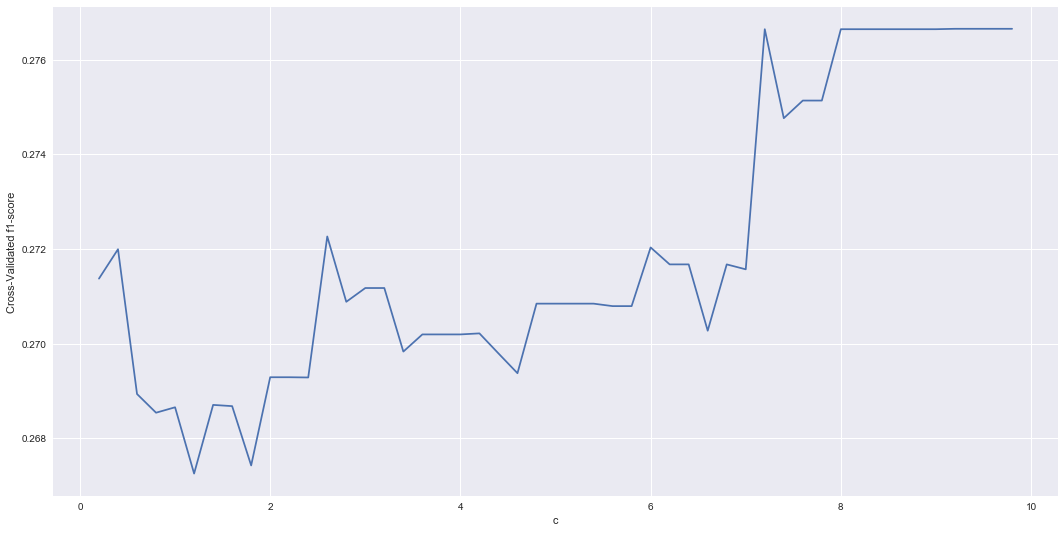

In [270]:
c_scores = []
a = np.array(range(1, 50, 1)) / 5
for i in a:
    log_reg = LogisticRegression(max_iter = 10000, C=i)
    c_scores.append(cross_val_score(log_reg, data.drop(['G1', 'G2', 'G3', 'passed', 'Mark'], axis=1).astype('int'), data['Mark'].astype('int'), cv=5, scoring='f1_macro').mean())

plt.figure(figsize=(18,9))                    
plt.plot(a, c_scores)
plt.xlabel('c')
plt.ylabel('Cross-Validated f1-score')
plt.show()

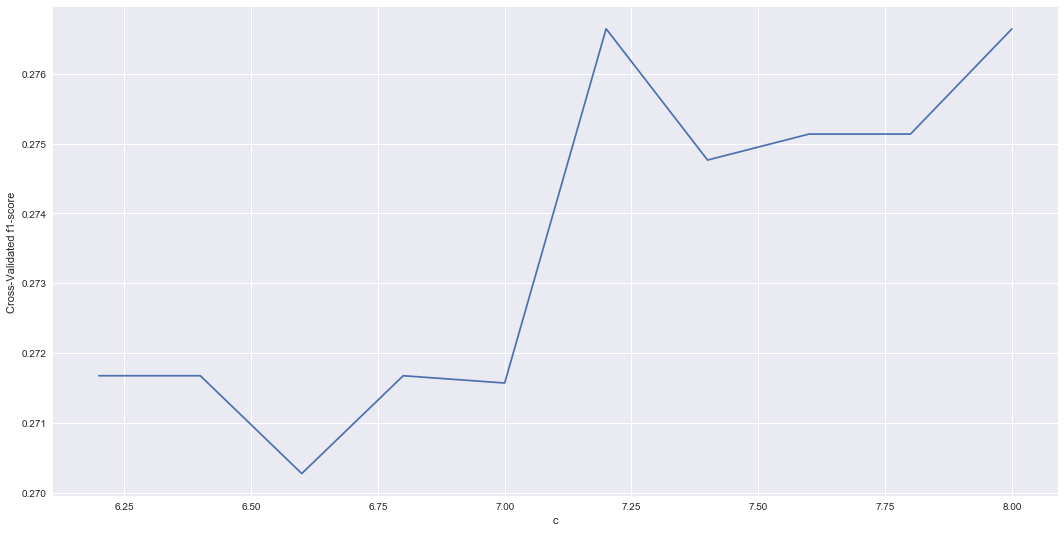

In [271]:
plt.figure(figsize=(18,9))                    
plt.plot(a[30:40], c_scores[30:40])
plt.xlabel('c')
plt.ylabel('Cross-Validated f1-score')
plt.show()

In [272]:
log_reg = LogisticRegression(max_iter = 10000, C=7.17)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

accuracy(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.6475095785440613
              precision    recall  f1-score   support

           1       1.00      0.07      0.14        27
           2       0.65      0.95      0.77       160
           3       0.62      0.23      0.34        65
           4       0.00      0.00      0.00         9

    accuracy                           0.65       261
   macro avg       0.57      0.31      0.31       261
weighted avg       0.66      0.65      0.57       261



array([[  2,  25,   0,   0],
       [  0, 152,   8,   0],
       [  0,  50,  15,   0],
       [  0,   8,   1,   0]])

Оценку 4 не предсказывает совсем

#### Дерево решений

In [280]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, max_features='auto')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.44061302681992337
              precision    recall  f1-score   support

           1       0.23      0.33      0.27        27
           2       0.57      0.61      0.59       160
           3       0.17      0.12      0.14        65
           4       0.00      0.00      0.00         9

    accuracy                           0.44       261
   macro avg       0.24      0.27      0.25       261
weighted avg       0.41      0.44      0.43       261



array([[ 9, 15,  2,  1],
       [27, 98, 35,  0],
       [ 4, 52,  8,  1],
       [ 0,  7,  2,  0]])

Уже получше

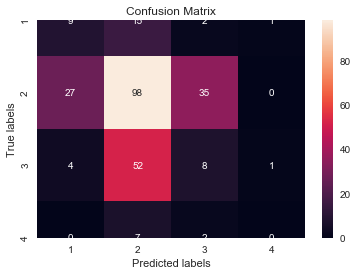

In [281]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(['1', '2', '3', '4'])
ax.set_yticklabels(['1', '2', '3', '4'])
plt.show()

Вывод: в многоклассовой классификации модель, построенная с помощью дерева решений, проявила себя наилучшим образом.
В бинарной классификации высокую точность можно объяснить преобладающим количеством определенной оценки и переобучением модели.

## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.